In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import glob
# import utils as ut
from sklearn.linear_model import LinearRegression

# import the dataframes 

## With gaps

In [2]:
list_file = [i for i in glob.glob('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/*') if '.csv' in i]

In [3]:
df_NIPBL_untreated_gaps, df_wt_gaps,df_NIPBL_treated_gaps,df_msd_test_eom_gaps,df_sororin_treated_gaps,df_untreated_gaps,df_sororin_untreated_gaps = map(pd.read_csv,list_file)

In [84]:
df_NIPBL_untreated_gaps

,Unnamed: 0.1,Unnamed: 0,lags(s),MSD(µm^2),weight,uniqueid,track_id,trStart,channel,cell_type,treatment,correction,file,gaps
0,0,0,10.0,0.041686,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...,1
1,1,1,20.0,0.049861,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...,1
2,2,2,30.0,0.073884,21.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...,1
3,3,3,40.0,0.103948,20.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...,1
4,4,4,50.0,0.103560,19.0,c62f66cc1152e68a,79,0,cohesin,NIPBL,untreated,corrected,20230529_Rad21-Halo_NIPBL_1C5_0h_1_FullseqTIRF...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658506,76448,4,50.0,0.111603,11.0,65aaf5f956570418,2514,152,DNA,NIPBL,untreated,uncorrected,20230526_Rad21-Halo_NIPBL_1C5_0h_2_FullseqTIRF...,1
658507,76449,5,60.0,0.125272,10.0,65aaf5f956570418,2514,152,DNA,NIPBL,untreated,uncorrected,20230526_Rad21-Halo_NIPBL_1C5_0h_2_FullseqTIRF...,1
658508,76450,6,70.0,0.159055,10.0,65aaf5f956570418,2514,152,DNA,NIPBL,untreated,uncorrected,20230526_Rad21-Halo_NIPBL_1C5_0h_2_FullseqTIRF...,1
658509,76451,7,80.0,0.262563,11.0,65aaf5f956570418,2514,152,DNA,NIPBL,untreated,uncorrected,20230526_Rad21-Halo_NIPBL_1C5_0h_2_FullseqTIRF...,1


## Without gaps

In [107]:
list_files_cor = glob.glob('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/*/msd_corrected__*')
list_files_uncor = glob.glob('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/*/msd_uncorrected__*')

In [109]:
list_files = list_files_cor + list_files_uncor

In [110]:
for i in list_files:
    if 'corrected' in i:
        print(i)

/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/20230605_Rad21-Halo_G6_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230605_Rad21-Halo_G6_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv
/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/20230531_Rad21-Halo_sororin_2D5_0h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230531_Rad21-Halo_sororin_2D5_0h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv
/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/20230529_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230529_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv
/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.

In [113]:
df_list = []
for file in list_files:
    # print(list_files)
    df = pd.read_csv(file)
    df.tamsd = df.tamsd*(0.16**2) # from pixel to µm
    df.lags = df.lags*10 # from frame to seconds
    df.tamsd = df.tamsd - (2*(0.035**2)) # subtract the localization error
    df.rename(columns={'tamsd':'MSD(µm^2)','lags':'lags(s)'}, inplace=True)

    if 'NIPBL' in file:
        df['cell_type'] = ['NIPBL']*len(df)
    if 'sororin' in file or 'Sororin' in file:
        df['cell_type'] = ['sororin']*len(df)
    if 'G6' in file:
        df['cell_type'] = ['WT']*len(df)
        df['treatment'] = ['untreated']*len(df)
    
    if '6h' in file or '3h' in file:
        df['treatment'] = ['treated']*len(df)
    if '0h' in file:
        df['treatment'] = ['untreated']*len(df)
    if '40mW' in file:
        df['treatment'] = ['untreated']*len(df)
    
    if 'corrected' in file:
        df['correction'] = ['corrected']*len(df)
    if 'uncorrected' in file:
        df['correction'] = ['uncorrected']*len(df)


    df['file'] = [file.split('/')[8]]*len(df)
    df.replace('w1','cohesin', inplace=True)
    df.replace('w2','DNA', inplace=True)
    df_list.append(df)

df_combined = pd.concat(df_list)
df_combined.drop(columns=['Unnamed: 0','chunk_of_traj'], inplace=True)

In [115]:
df_NIPBL_treated = df_combined[(df_combined['cell_type']=='NIPBL') & (df_combined['treatment']=='treated')&(df_combined.correction == 'corrected')].copy(deep=True)
df_NIPBL_untreated = df_combined[(df_combined['cell_type']=='NIPBL') & (df_combined['treatment']=='untreated')&(df_combined.correction == 'corrected')].copy(deep=True)
df_sororin_treated = df_combined[(df_combined['cell_type']=='sororin') & (df_combined['treatment']=='treated')&(df_combined.correction == 'corrected')].copy(deep=True)
df_sororin_untreated = df_combined[(df_combined['cell_type']=='sororin') & (df_combined['treatment']=='untreated')&(df_combined.correction == 'corrected')].copy(deep=True)
df_wt = df_combined[(df_combined['cell_type']=='WT') & (df_combined['treatment']=='untreated')&(df_combined.correction == 'corrected')].copy(deep=True)

In [116]:
df_wt_gaps['gaps'] = [1]*len(df_wt_gaps)
df_wt['gaps'] = [0]*len(df_wt)

In [117]:
df_wts = pd.concat([df_wt,df_wt_gaps])

Text(0.5, 0.98, 'WT')

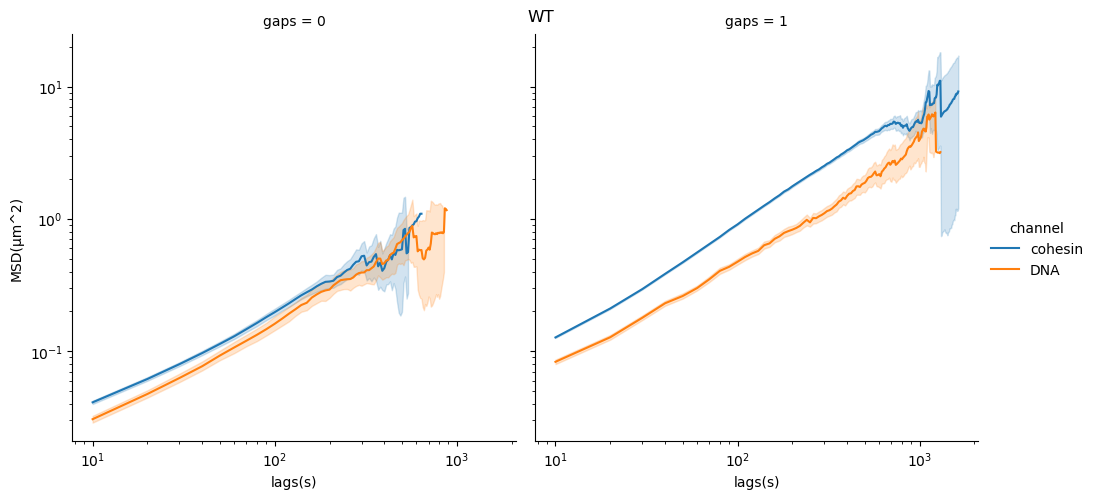

In [119]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_wts, col='gaps', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('WT')

In [120]:
df_NIPBL_treated_gaps['gaps'] = [1]*len(df_NIPBL_treated_gaps)
df_NIPBL_treated['gaps'] = [0]*len(df_NIPBL_treated)

In [121]:
df_NIPBL = pd.concat([df_NIPBL_treated,df_NIPBL_treated_gaps])

Text(0.5, 0.98, 'NIPBL treated')

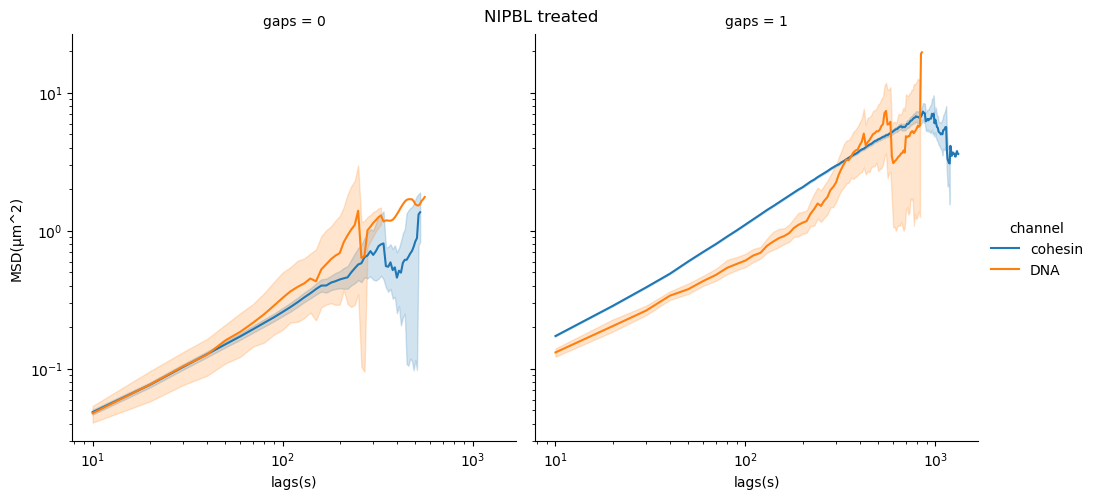

In [122]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_NIPBL, col='gaps', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('NIPBL treated')

In [123]:
df_NIPBL_untreated_gaps['gaps'] = [1]*len(df_NIPBL_untreated_gaps)
df_NIPBL_untreated['gaps'] = [0]*len(df_NIPBL_untreated)
df_NIPBL_un = pd.concat([df_NIPBL_untreated,df_NIPBL_untreated_gaps])

Text(0.5, 0.98, 'NIPBL untreated')

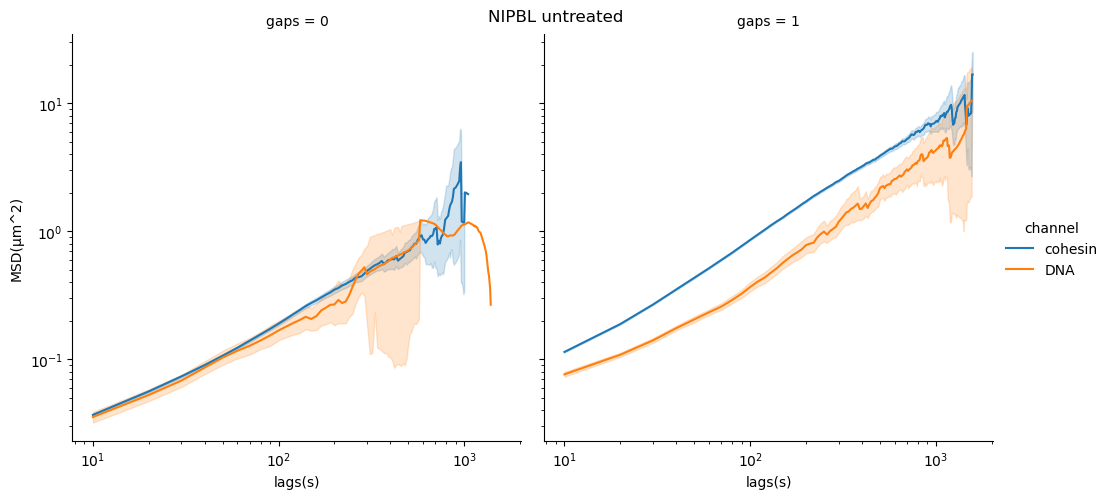

In [124]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_NIPBL_un, col='gaps', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('NIPBL untreated')

In [125]:
df_NIPS = pd.concat([df_NIPBL,df_NIPBL_un])

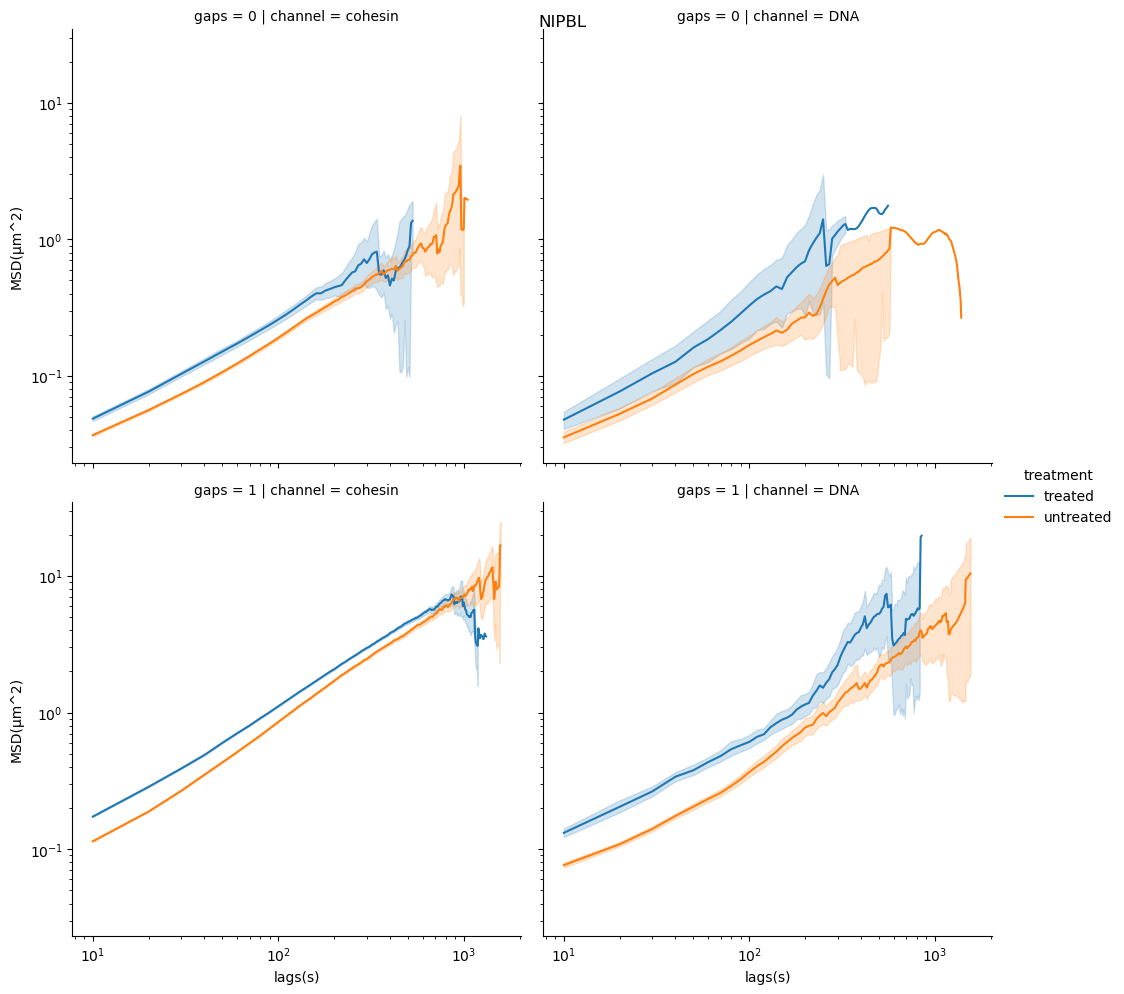

In [173]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_NIPS, row='gaps', kind='line', col='channel',hue='treatment')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('NIPBL')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/NIPBL.png',dpi=300)

In [127]:
df_sororin_treated_gaps['gaps'] = [1]*len(df_sororin_treated_gaps)
df_sororin_treated['gaps'] = [0]*len(df_sororin_treated)

In [128]:
df_sororin = pd.concat([df_sororin_treated,df_sororin_treated_gaps])

Text(0.5, 0.98, 'sororin treated')

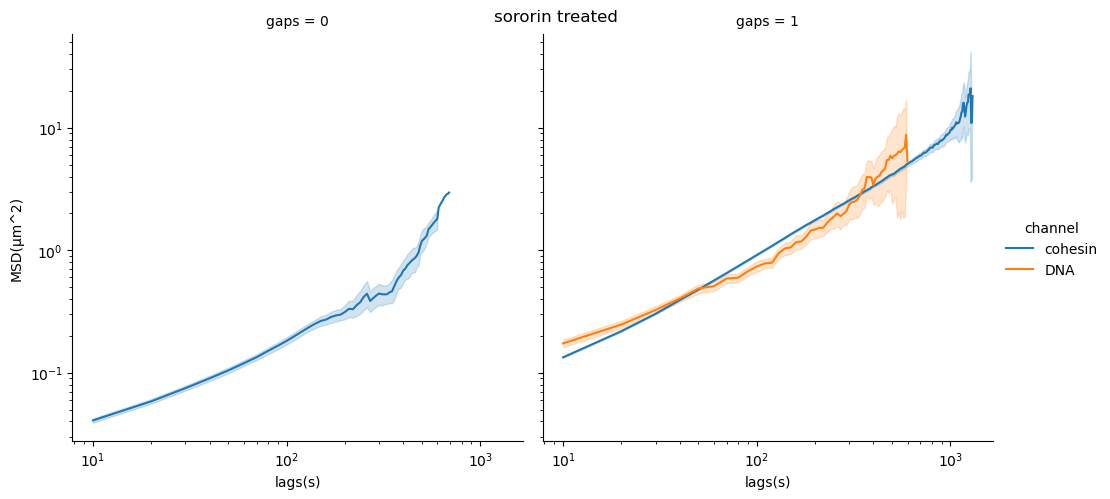

In [129]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_sororin, col='gaps', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('sororin treated')

In [130]:
df_sororin_untreated_gaps['gaps'] = [1]*len(df_sororin_untreated_gaps)
df_sororin_untreated['gaps'] = [0]*len(df_sororin_untreated)

In [131]:
df_sororin_un = pd.concat([df_sororin_untreated,df_sororin_untreated_gaps])

Text(0.5, 0.98, 'sororin untreated')

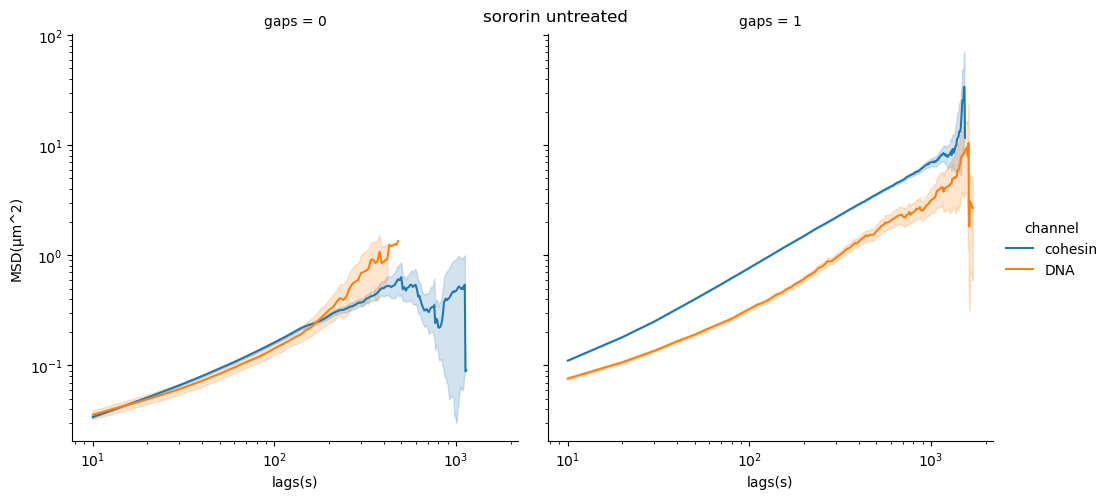

In [132]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_sororin_un, col='gaps', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('sororin untreated')

In [133]:
df_sororins = pd.concat([df_sororin,df_sororin_un])

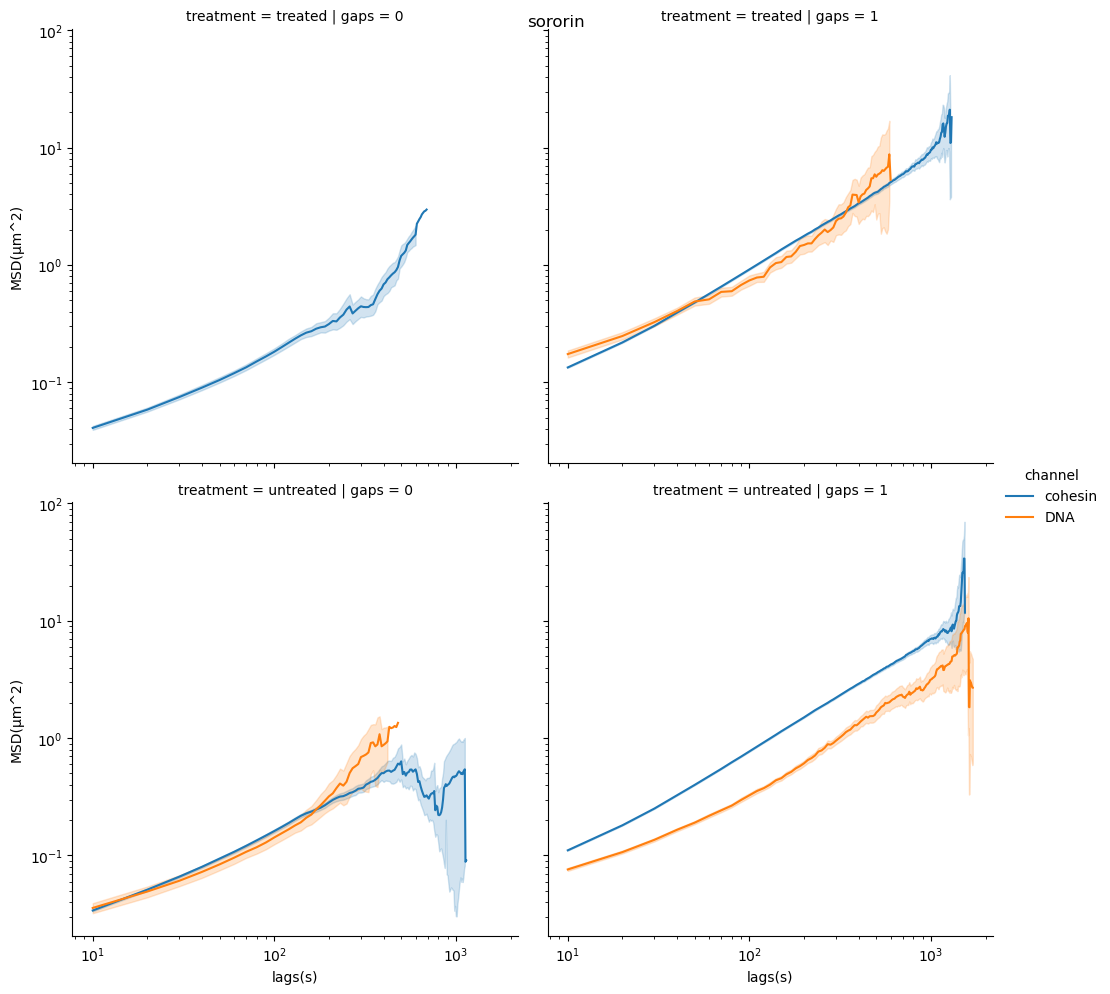

In [172]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_sororins, col='gaps', kind='line', hue='channel',row='treatment')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('sororin')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/sororin.png',dpi=300)

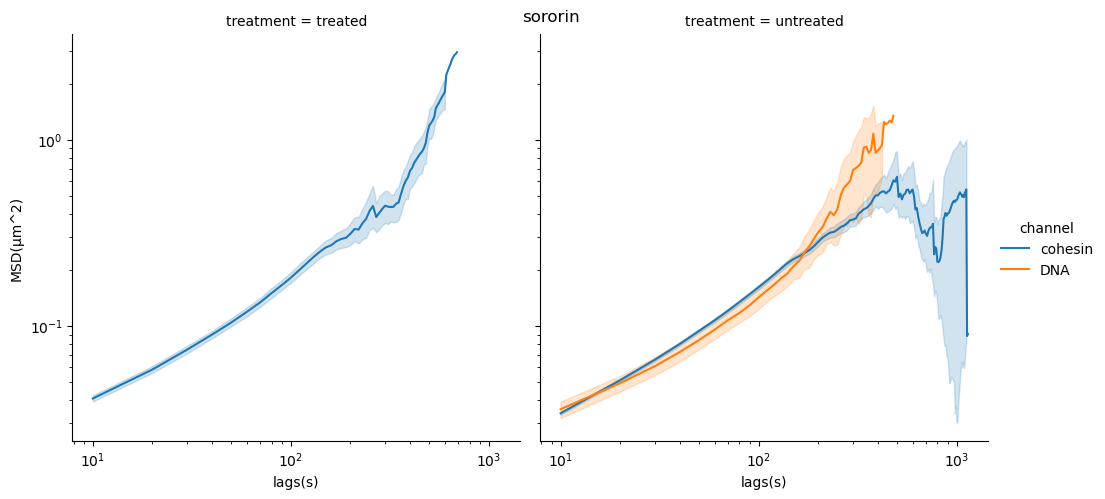

In [171]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_sororins[df_sororins.gaps == 0], col='treatment', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('sororin')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/sororin_no_gaps.png',dpi=300)

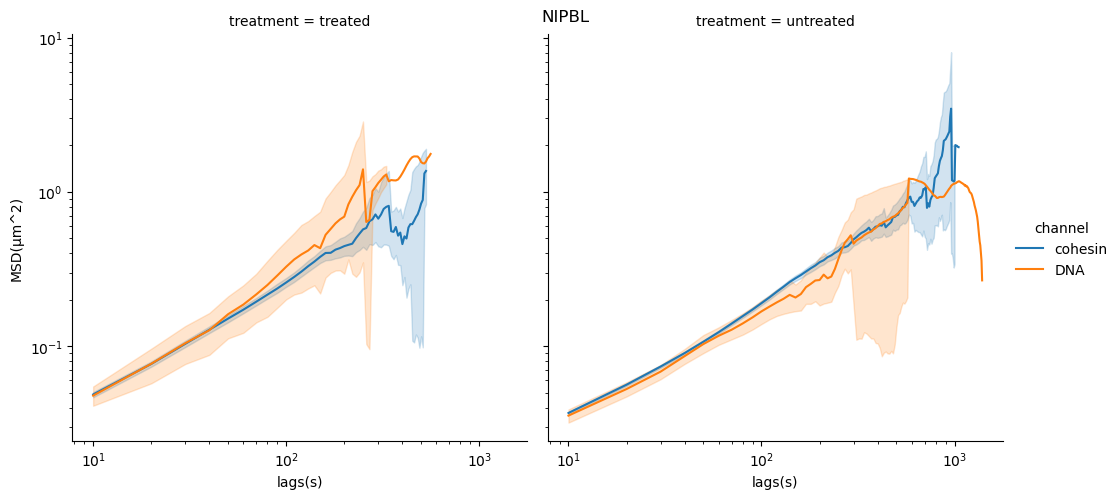

In [170]:
a = sns.relplot(x='lags(s)',y='MSD(µm^2)',data=df_NIPS[df_NIPS.gaps == 0], col='treatment', kind='line', hue='channel')
plt.xscale('log')
plt.yscale('log')
a.fig.suptitle('NIPBL')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/NIPBL_no_gaps.png',dpi=300)

# fit

In [137]:
def get_D_alpha(traj, min_length=10, numPoints=5):
    if traj.shape[0]<min_length:
        return np.nan, np.nan, np.nan, np.nan,np.nan,np.nan
    model = LinearRegression()
    x = np.log10(traj.loc[:,"lags(s)"])
    y = np.log10(traj.loc[:,"MSD(µm^2)"])
    # sampleWeight = traj.loc[traj.correction=="corrected","weight"]
    #print(x.to_numpy().reshape(-1,1)[:numPoints], y.to_numpy()[:numPoints], sampleWeight.to_numpy()[:numPoints])
    model.fit(x.to_numpy().reshape(-1,1)[:numPoints], y.to_numpy()[:numPoints])#, sample_weight = sampleWeight.to_numpy()[:numPoints])
    y_pred = model.predict(x.to_numpy().reshape(-1,1))
    return model.intercept_, model.coef_[0],traj.iloc[0].treatment,traj.iloc[0].file,traj.iloc[0].channel,traj.iloc[0].gaps#10**y_pred,10**x

In [178]:
coefficients = df_sororins.groupby(by="uniqueid").apply(get_D_alpha, min_length=10, numPoints=5).to_frame()

In [179]:
coefficients['D'], coefficients['alpha'], coefficients['treatment'], coefficients['file'],coefficients['channel'],coefficients['gaps'] = zip(*coefficients.iloc[:,0])
coefficients['D'] = 10**coefficients['D']
coefficients.drop(columns=[0],inplace=True)

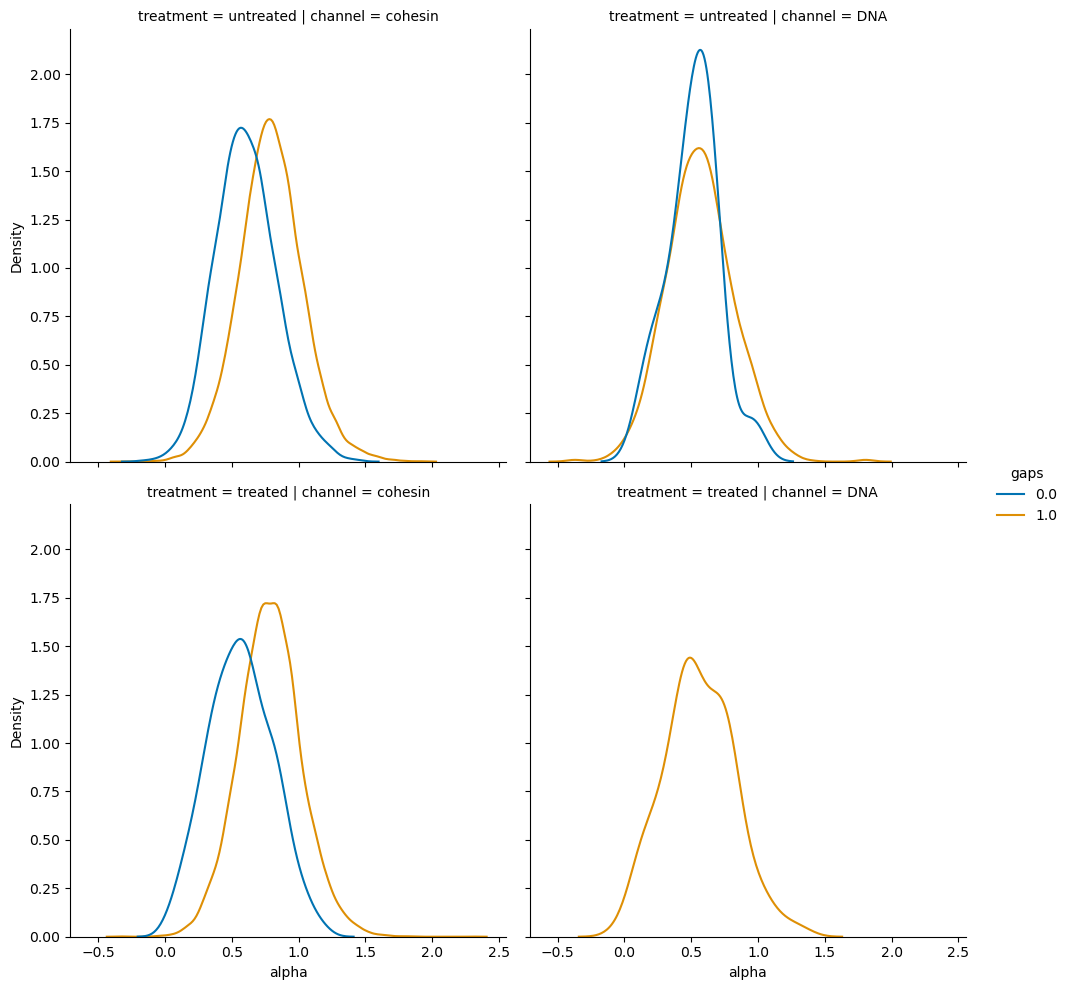

In [180]:
a = sns.displot(data=coefficients, x="alpha", kind="kde", hue="gaps",common_norm=False,col='channel',palette='colorblind',row='treatment')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/alpha_sororin.png',dpi=300)

In [181]:
print(coefficients[(coefficients.channel == 'DNA')&(coefficients.gaps == 1)&(coefficients.treatment == 'untreated')].alpha.median())
print(coefficients[(coefficients.channel == 'DNA')&(coefficients.gaps == 0)&(coefficients.treatment == 'untreated')].alpha.median())

# print(coefficients[(coefficients.channel == 'DNA')&(coefficients.gaps == 1)&(coefficients.treatment == 'treated')].alpha.median())
# print(coefficients[(coefficients.channel == 'DNA')&(coefficients.gaps == 0)&(coefficients.treatment == 'treated')].alpha.median())

0.5593031105004493
0.5467257293746156


In [182]:
print(coefficients[(coefficients.channel == 'cohesin')&(coefficients.gaps == 1)&(coefficients.treatment == 'untreated')].alpha.median())
print(coefficients[(coefficients.channel == 'cohesin')&(coefficients.gaps == 0)&(coefficients.treatment == 'untreated')].alpha.median())

# print(coefficients[(coefficients.channel == 'cohesin')&(coefficients.gaps == 1)&(coefficients.treatment == 'treated')].alpha.median())
# print(coefficients[(coefficients.channel == 'cohesin')&(coefficients.gaps == 0)&(coefficients.treatment == 'treated')].alpha.median())


0.7909705767393547
0.599503645855522


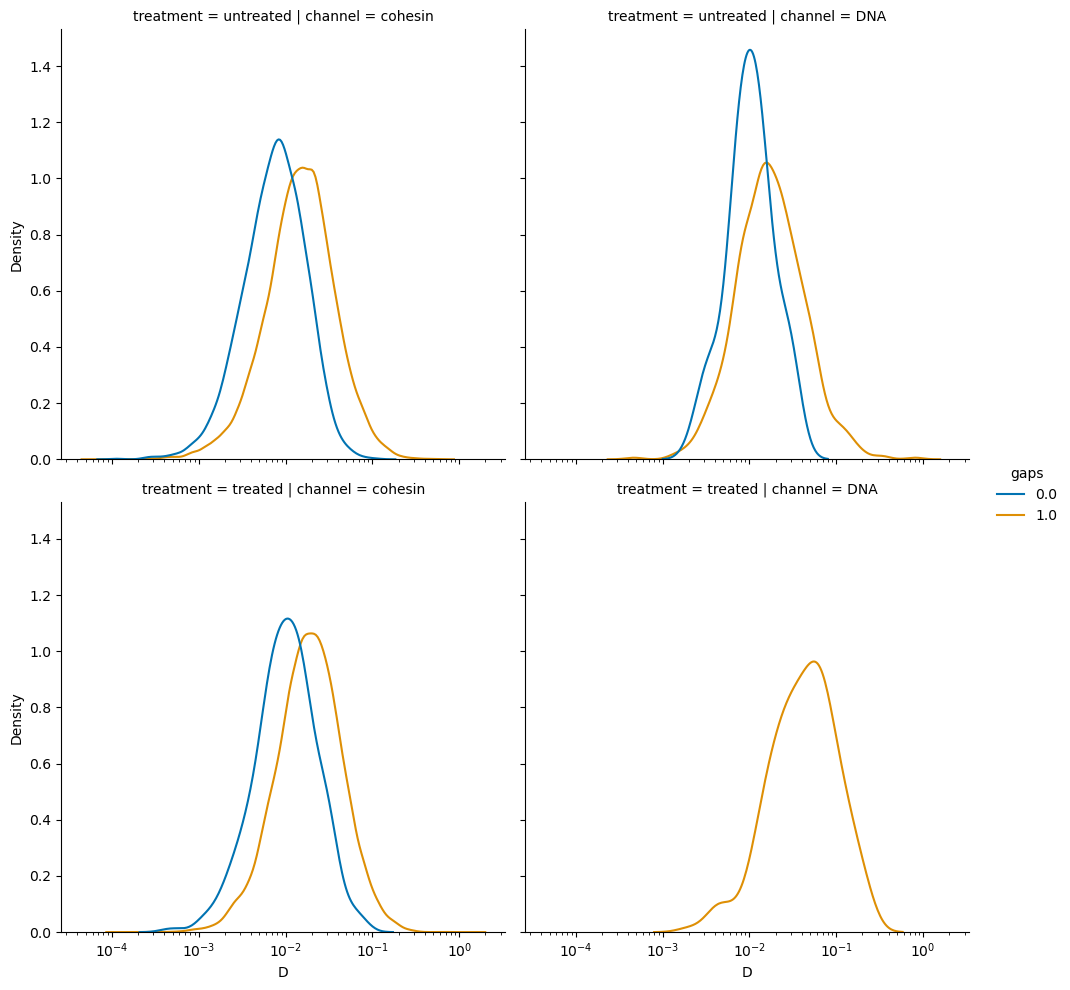

In [183]:
a = sns.displot(data=coefficients, x="D", kind="kde", hue="gaps",common_norm=False,col='channel',palette='colorblind', log_scale=True,row='treatment')
plt.savefig('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/plots/no_gaps/D_sororin.png',dpi=300)

In [184]:
d = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/test_tracking_without_gaps/20230602_Rad21-Halo_sororin_2D5_3h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/tracks_merged__20230602_Rad21-Halo_sororin_2D5_3h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')

In [186]:
d = d[d.channel == 'w2']

<AxesSubplot: ylabel='Frequency'>

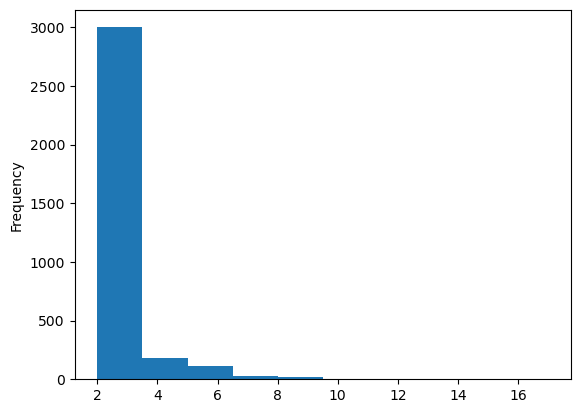

In [189]:
d.groupby(by='track_id').size().plot(kind='hist')